## Act Report - Rafael Roldao L Dantas

- The analysis below were prepared based on **WeRateDogs** twitter. The followers of this twitter account post photos of their dogs and give a rating, including the score (numerator) and the maximum value (denominator).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

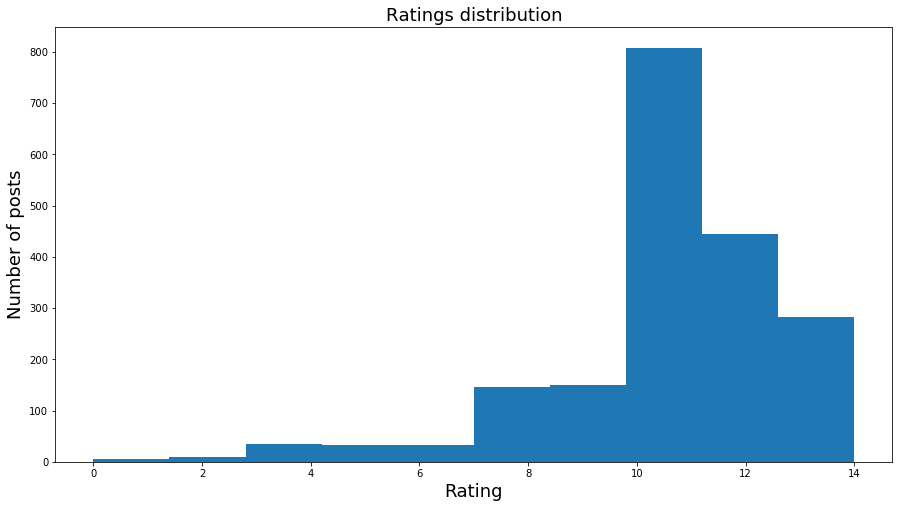

In [10]:
ratings = twitter_archive_master.groupby('rating_numerator')['tweet_id'].count()
ratings_clean = twitter_archive_master[twitter_archive_master['rating_numerator'] <= 20]
ratings_clean.rating_numerator.plot(kind='hist', figsize=(15,8));
plt.title('Ratings distribution', fontsize=18);
plt.xlabel('Rating', fontsize=18);
plt.ylabel('Number of posts', fontsize=18);

- The chart above shows the histogram of the rating distributions for ratings with the denominator 10, excluding extreming outliers (ratings above 20) to improve the visualization.
- Despite a rating above 10 (given the denominator is 10) does not make sense mathematically, this is an unique metric for the twitter **WeRateDogs**.
- This analysis includes the score that the owner of the post gives to the dog, not an outside and independent score.
- As shown above, the scores are concentrated in the range 10-14 (out of 10).

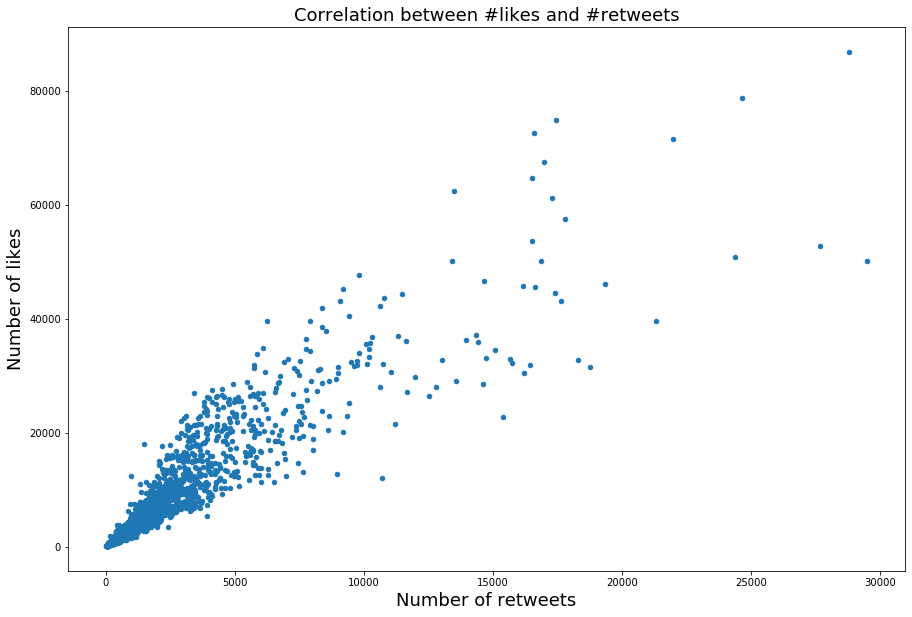

In [12]:
retweet_clean = twitter_archive_master[twitter_archive_master['retweet_count'] <= 30000]
retweet_clean.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15,10));
plt.title('Correlation between #likes and #retweets', fontsize=18);
plt.xlabel('Number of retweets', fontsize=18);
plt.ylabel('Number of likes', fontsize=18);

- The chart above shows the correlation between the number o retweets and number of likes, excluding extreme outliers (retweets above 30k) to facilitate the visualization.
- As expected, there is a high correlatin between the number of likes and the number of retweets. Therefore, if someone like the post, there is a high chance that he/she will retweet the post for his/her own network.

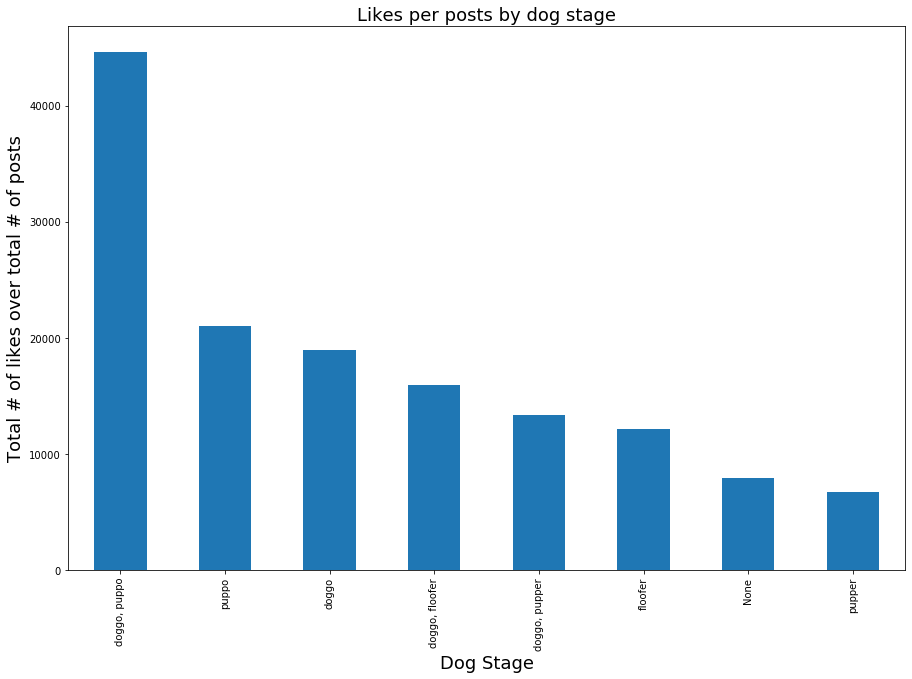

In [16]:
dog_stage_clean = twitter_archive_master
dog_stage_clean.dog_stage = twitter_archive_master.dog_stage.replace(np.nan, 'None')
likes_by_dog_stage = dog_stage_clean.groupby('dog_stage')['favorite_count'].sum()
likes_by_dog_stage = likes_by_dog_stage.sort_values(ascending=False)
posts_by_dog_stage = dog_stage_clean.groupby('dog_stage')['tweet_id'].count()
posts_by_dog_stage = posts_by_dog_stage.sort_values(ascending=False)
likes_per_post = likes_by_dog_stage / posts_by_dog_stage
likes_per_post = likes_per_post.sort_values(ascending=False)
likes_per_post.plot(kind='bar', figsize=(15,10));
plt.title('Likes per posts by dog stage', fontsize=18);
plt.xlabel('Dog Stage', fontsize=18);
plt.ylabel('Total # of likes over total # of posts', fontsize=18);

- In some posts, people include the tags **pupper, doggo, puppo, and floofer** (For more information about the meaning of each category, please acess the [link](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576#)).
- Is there an specific dog stage tag that normally receives more likes? On average, when people include in posts the tags doggo and puppo, they receive more than double number of likes than other tags (or combination of tags) or no tags. It does not mean that there is a causation relation between dog stage tags and number of likes, especially considering the tags doggo and puppo appeared only 8 times in the data base. 